In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [2]:
# Load datasets
X, Y = load_planar_dataset()

In [3]:
X.shape

(2, 400)

In [4]:
Y.shape

(1, 400)

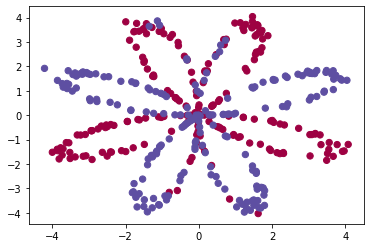

In [5]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral)
plt.show()

We have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 


In [6]:
print("Number of training examples: ", X.shape[1])
print("Shape of X:", X.shape)
print("shape of Y:", Y.shape)

Number of training examples:  400
Shape of X: (2, 400)
shape of Y: (1, 400)


Before building a full neural network, lets first see how **logistic regression** performs on this problem.

In [7]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV(cv=5)
clf.fit(X.T, Y.T.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


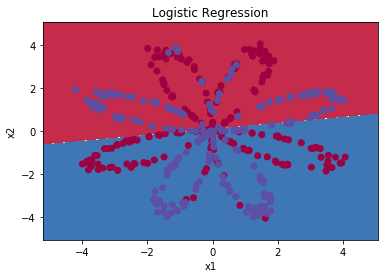

In [8]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0,:])
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

## 4 - Neural Network model
We saw that Logistic regression did not work well on the "flower dataset". 
We are going to train a Neural Network with a single hidden layer.


### 4.1 - Defining the neural network structure ####
#only 1 hidden layer of size: 4

In [9]:
X.shape

(2, 400)

In [10]:
Y.shape

(1, 400)

In [102]:
#Step1 Defining the structure of the Neural Network
def defining_structure(X,Y,n_h):
    n_x = X.shape[0]
    n_h = n_h
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [76]:
#test above function:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = defining_structure(X_assess, Y_assess, n_h=4)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [77]:
#Step2 Initialize parameters
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    w1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    w2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    return (w1,b1,w2,b2)

In [78]:
n_x, n_h, n_y = initialize_parameters_test_case()

w1,b1,w2,b2 = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(w1))
print("b1 = " + str(b1))
print("W2 = " + str(w2))
print("b2 = " + str(b2))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [79]:
# Step3 Forward Propagation

In [80]:
X.shape

(2, 400)

In [81]:
def forward_propagation(X,w1,b1,w2,b2):
    Z1 = np.dot(w1, X)+b1   #4X2*2X400 + 4X1 == 4X400
    A1 = np.tanh(Z1)        #4X400
    Z2 = np.dot(w2, A1)+b2  #1X4 * 4X400 + 1X1 == 1X400
    A2 = sigmoid(Z2)        #1X400
    return (Z1,A1,Z2,A2)

In [82]:
X_assess, parameters = forward_propagation_test_case()
Z1,A1,Z2,A2 = forward_propagation(X_assess, parameters['W1'],parameters['b1'],parameters['W2'],parameters['b2'])

# Note: we use the mean here just to check the correct working of the above function. 
print(np.mean(Z1) ,np.mean(A1),np.mean(Z2),np.mean(A2))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [83]:
#Step 4 Computing Cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    J = (-1/m)* np.sum(Y*np.log(A2)+(1-Y)*np.log(1-A2))
    return J

In [84]:
# Test cost function
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


In [85]:
# Backward Propagation

In [86]:
#Step 5 Backward Propagation
def backward_propagation(W1,b1,W2,b2,Z1,A1,Z2,A2,X,Y):
    m = Y.shape[1]
    dZ2 = A2 - Y              #1X400 - 1X400
    dW2 = (1/m)*np.dot(dZ2, A1.T)    #4X400 * 400X1 = 4X1
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims=True)   #1X400
    dZ1 = np.dot(W2.T, dZ2)*((1-((np.tanh(Z1))**2)))  #4X1*1X400 - 4X400
    dW1 = (1/m)*np.dot(dZ1,X.T)                #2X400 *400X4
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims=True)
    return dW1,db1,dW2,db2

In [87]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

dW1,db1,dW2,db2 = backward_propagation(parameters['W1'],parameters['b1'],parameters['W2'],parameters['b2'], cache['Z1'],cache['A1'],cache['Z2'],cache['A2'], X_assess, Y_assess)
print ("dW1 = "+ str(dW1))
print ("db1 = "+ str(db1))
print ("dW2 = "+ str(dW2))
print ("db2 = "+ str(db2))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [88]:
# Step6 Update parameters

In [89]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1- (alpha * dW1)
    b1 = b1- (alpha * db1)
    W2 = W2- (alpha * dW2)
    b2 = b2- (alpha * db2)
    return W1,b1,W2,b2

In [90]:
parameters, grads = update_parameters_test_case()
W1,b1,W2,b2 = update_parameters(parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2'], grads['dW1'], grads['db1'], grads['dW2'], grads['db2'], 1.2)

print("W1 = " + str(W1))
print("b1 = " + str(b1))
print("W2 = " + str(W2))
print("b2 = " + str(b2))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [107]:
# Step 7 Integrate all the above in a single model
def model(X,Y, alpha, n_h,num_iterations = 10000, print_cost=False):
    costs = []
    np.random.seed(3)
    n_x, n_h, n_y = defining_structure(X,Y, n_h)
    W1,b1,W2,b2 = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        Z1,A1,Z2,A2= forward_propagation(X, W1,b1,W2,b2)
        
        J = compute_cost(A2, Y)
        
        dW1,db1,dW2,db2 = backward_propagation(W1,b1,W2,b2,Z1,A1,Z2,A2,X,Y)
        
        W1,b1,W2,b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 1000 == 0:
            costs.append(J)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, J))
   
    plt.plot(list(range(0,num_iterations,1000)),costs)
    plt.show()
                
    return W1,b1,W2,b2

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000218
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023


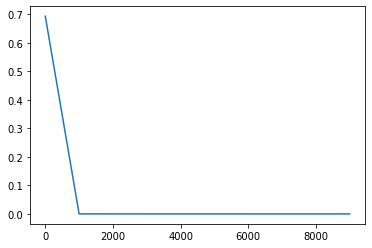

W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]


In [108]:
X_assess, Y_assess = nn_model_test_case()
W1,b1,W2,b2 = model(X_assess, Y_assess, n_h=4, num_iterations=10000, print_cost=True, alpha=1.2)
print("W1 = " + str(W1))
print("b1 = " + str(b1))
print("W2 = " + str(W2))
print("b2 = " + str(b2))

In [64]:
# Step 8 Prediction

In [93]:
def prediction(W1, b1, W2, b2, X):
    
    Z1,A1,Z2,A2 = forward_propagation(X, W1,b1,W2,b2)
    predictions = A2>0.5
    
    return predictions
    

In [94]:
parameters, X_assess = predict_test_case()

predictions = prediction(W1, b1, W2, b2, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


In [95]:
print(predictions)

[[ True False  True]]


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219497
Cost after iteration 9000: 0.218569


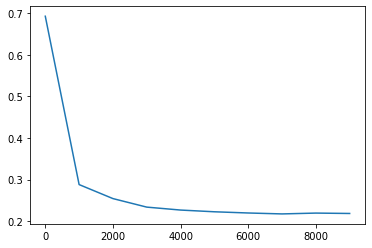

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

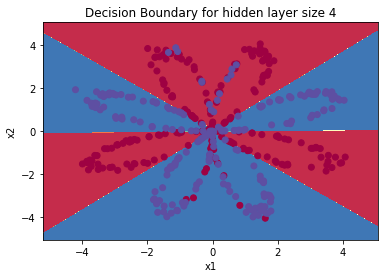

In [96]:
# Build a model with a n_h-dimensional hidden layer
W1, b1, W2, b2 = model(X, Y, n_h=4,num_iterations = 10000, print_cost=True, alpha = 1.2)

# Plot the decision boundary
plot_decision_boundary(lambda x: prediction(W1, b1, W2, b2, x.T), X, Y[0,:])
plt.title("Decision Boundary for hidden layer size " + str(4))

In [97]:
# Print accuracy
predictions = prediction(W1, b1, W2, b2, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


### Tuning hidden layer size ###


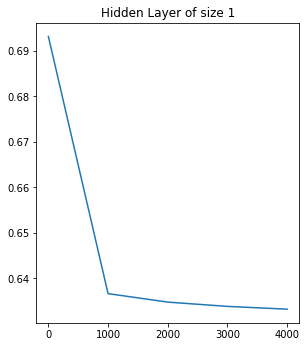

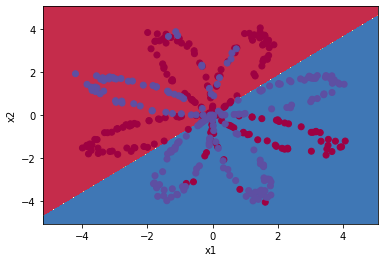

Accuracy for 1 hidden units: 67.5 %


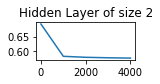

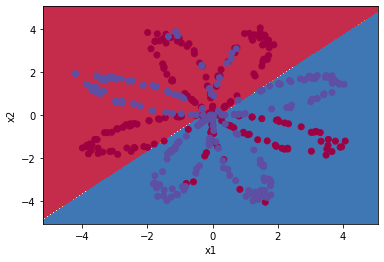

Accuracy for 2 hidden units: 67.25 %


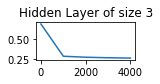

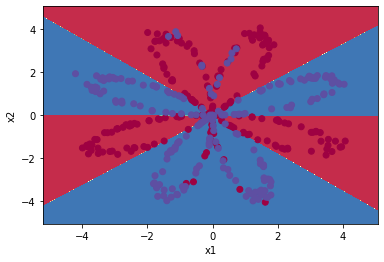

Accuracy for 3 hidden units: 90.75 %


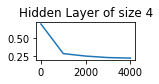

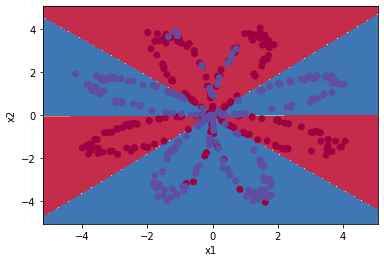

Accuracy for 4 hidden units: 90.5 %


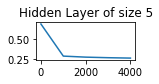

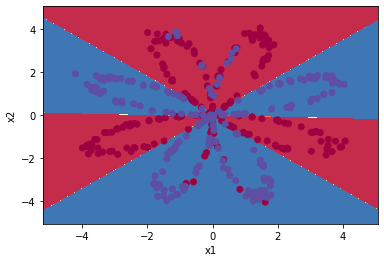

Accuracy for 5 hidden units: 91.25 %


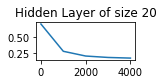

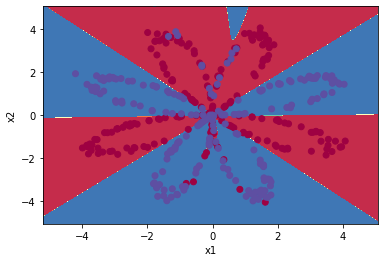

Accuracy for 20 hidden units: 90.0 %


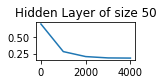

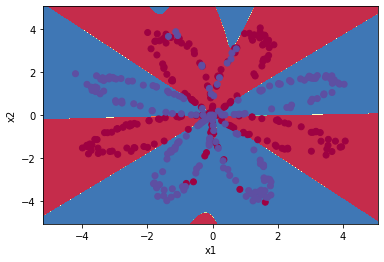

Accuracy for 50 hidden units: 90.75 %


In [111]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 3, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    W1, b1, W2, b2  = model(X, Y, n_h=n_h, num_iterations = 5000, alpha=1.2)
    plot_decision_boundary(lambda x: prediction(W1, b1, W2, b2 , x.T), X, Y[0,:])
    plt.show()
    predictions = prediction(W1, b1, W2, b2 , X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.